# Getting information about the orbit

In [1]:
'''
Loading libraries
'''
import sys,os
sys.path.append('../../../../sophi-fdt-dpp/')  
os.environ['SPICE'] = '/Users/orozco/Dropbox_folder/Python/solar-orbiter-orbit-data/'
import sophi_fdt_dpp as fdt
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime


In [2]:
when = [datetime(2023, 9, 6, 21, 0, 0), datetime(2023, 9, 6, 21, 15, 0)]

solo_j2000 = fdt.phi_orbit(when, 'Solar Orbiter', frame='ECLIPJ2000')
solo_heeq = fdt.phi_orbit(when, 'Solar Orbiter', frame='SOLO_HEEQ')

for i, time in enumerate(when):
    print('____________________J2000 - HEEQ_______________________')
    print('Time: ', time)
    print('   Solo Sun center [degree]: ', solo_j2000.lat[i] * 180 / np.pi, solo_heeq.lat[i] * 180 / np.pi)
    print('   Longitud (wrt Earth): ', solo_j2000.lon[i] * 180 / np.pi, solo_heeq.lon[i] * 180 / np.pi)
    print('   Distance [AU]: ', solo_j2000.r[i], solo_heeq.r[i])
    print('   Solar size in arcsec from solo: ', solo_j2000[i].s_size, solo_heeq[i].s_size)
    print('   FDT solar diameter in pixels from solo: ', solo_j2000[i].s_size / 3.61, solo_heeq[i].s_size / 3.61)
    print('   S/C roll: ',solo_j2000.roll[i],solo_heeq.roll[i])
    print('-------------------------------------------')

Kernel solo_ANC_soc-flown-mk.tm found at: /Users/orozco/Dropbox_folder/Python/solar-orbiter-orbit-data//kernels/mk/
Kernel solo_ANC_soc-flown-mk.tm found at: /Users/orozco/Dropbox_folder/Python/solar-orbiter-orbit-data//kernels/mk/
____________________J2000 - HEEQ_______________________
Time:  2023-09-06 21:00:00
   Solo Sun center [degree]:  2.0322279706507103 -4.608409810167436
   Longitud (wrt Earth):  142.08035039618719 158.3427995597314
   Distance [AU]:  0.6310917726246706 0.6310917726246705
   Solar size in arcsec from solo:  3038.9728093626577 3038.972809362658
   FDT solar diameter in pixels from solo:  841.8207228151407 841.8207228151408
   S/C roll:  0.0 0.0
-------------------------------------------
____________________J2000 - HEEQ_______________________
Time:  2023-09-06 21:15:00
   Solo Sun center [degree]:  2.0311375322420897 -4.610374520915196
   Longitud (wrt Earth):  142.09758037900698 158.34981237957504
   Distance [AU]:  0.6309728445240079 0.6309728445240078
   Sol

In [7]:
print(solo_heeq.vr,solo_j2000.vr,(solo_heeq.vr/299792.458+1 )*6173341)

[-19.76626615 -19.77015742] [-19.76626615 -19.77015742] [6172933.972078   6172933.89194872]


Kernel solo_ANC_soc-flown-mk.tm found at: /Users/orozco/Dropbox_folder/Python/solar-orbiter-orbit-data//kernels/mk/


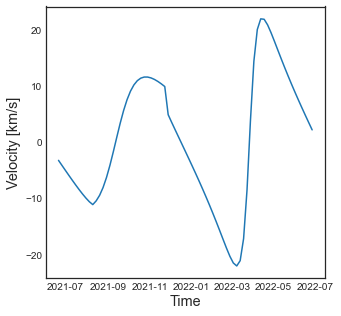

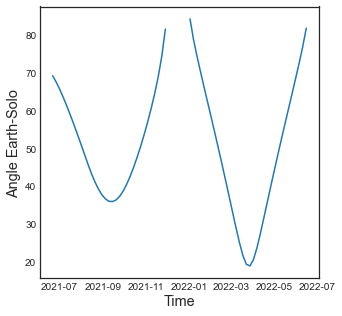

In [3]:
starttime=datetime(2021, 6, 21)
endtime=datetime(2022, 6, 27)
res_in_days=5

solo_info = fdt.phi_orbit(starttime, 'Solar Orbiter', end_date=endtime, resolution=res_in_days, frame='SOLO_HEEQ')

plt.plot_date(solo_info.time, solo_info.vr, '-')
plt.xlabel('Time')
plt.ylabel('Velocity [km/s]')
plt.show()

plt.plot_date(solo_info.time, solo_info.angle, '-')
plt.xlabel('Time')
plt.ylabel('Angle Earth-Solo')
plt.show()

In [4]:
def get_angles_solo_Earth(starttime=datetime(2021, 6, 21), endtime=datetime(2022, 6, 27), res_in_days=5):

    # load solo
    solo = fdt.phi_orbit(starttime, 'Solar Orbiter', end_date=endtime, resolution=res_in_days, frame='SOLO_HEEQ')
    Earth = fdt.phi_orbit(starttime, 'Earth', end_date=endtime, resolution=res_in_days, frame='SOLO_HEEQ')

    fig, ax = plt.subplots(1, 3, sharex= True, sharey= True, figsize=(15, 5))
    ax[0].plot(solo.x, solo.z, 'o', label='solo')
    ax[0].plot(Earth.x, Earth.z, 'o', label='Earth')
    ax[0].set_xlabel('x (AU)')
    ax[0].set_ylabel('z (AU)')
    ax[0].legend()
    ax[1].plot(solo.x, solo.y, 'o')
    ax[1].plot(Earth.x, Earth.y, 'o')
    ax[1].set_xlabel('x (AU)')
    ax[1].set_ylabel('y (AU)')

    ax[2].plot(solo.y, solo.z, 'o')
    ax[2].plot(Earth.y, Earth.z, 'o')
    ax[2].set_xlabel('y (AU)')
    ax[2].set_ylabel('z (AU)')

    for a in ax:
        a.grid()
        a.set_ylim(-1, 1)
        a.set_xlim(-1, 1)
    plt.tight_layout()
    plt.show()

    ang_heeq = fdt.angle([solo.x, solo.y, solo.z], [Earth.x, Earth.y, Earth.z])
    ang_solo = fdt.cart2sphere(solo.x, solo.y, solo.z)
    ang_earth = fdt.cart2sphere(Earth.x, Earth.y, Earth.z)
    diff = ang_earth[2] * 180 / np.pi - ang_solo[2] * 180 / np.pi
    idx = np.where(diff < 0)
    diff[idx] = 360 + diff[idx]

    x = np.array([solo.x, solo.y, solo.z])
    y = np.array([Earth.x, Earth.y, Earth.z])
    n = [0, 0, 1]
    ang2 = fdt.angle_3D(x, y, n)

    plt.plot_date(solo.time, ang_heeq, '-', label='Angle of Solo in HEEQ ref')
    plt.plot_date(solo.time, ang2, '-', label='Real angle between E-Solo')
    plt.plot_date(solo.time, ang_solo[2] * 180 / np.pi, '-', label='Spherical theta angle')
    plt.xlabel('Time')
    plt.ylabel('Angle Earth-Solo')
    plt.legend()
    plt.show()

    return solo.time, ang2


Kernel solo_ANC_soc-flown-mk.tm found at: /Users/orozco/Dropbox_folder/Python/solar-orbiter-orbit-data//kernels/mk/
Kernel solo_ANC_soc-flown-mk.tm found at: /Users/orozco/Dropbox_folder/Python/solar-orbiter-orbit-data//kernels/mk/


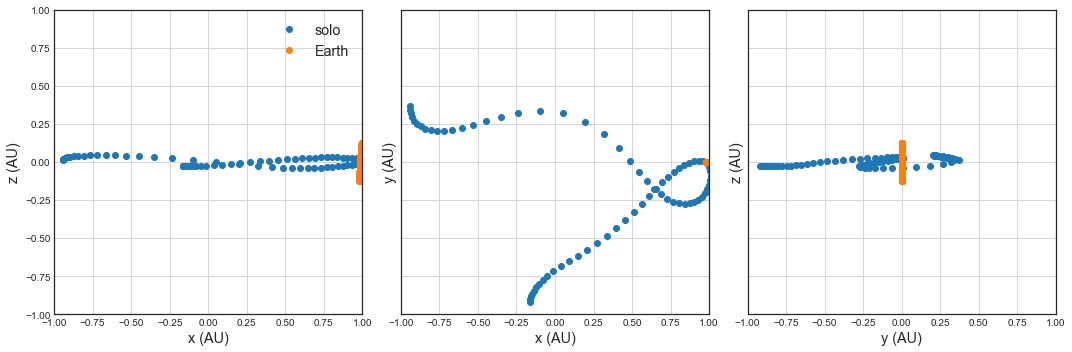

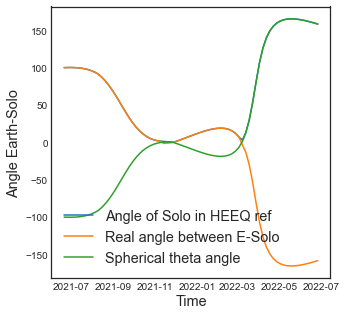

In [5]:
screc = get_angles_solo_Earth(starttime=datetime(2021, 6, 21), endtime=datetime(2022, 6, 27), res_in_days=5)